In [313]:
import h5py
filename = "1541962108935000000_167_838.h5"

In [314]:
import pytz
from datetime import datetime
timestamp = filename[0].split('_')
timezone = pytz.timezone('CET') 
utc_date = datetime.utcfromtimestamp(int(timestamp[0]) // 1000000000) ## 19 digit UNIX timestamp in UTC
utc_date = utc_date.strftime('UTC Date-Time: %Y-%m-%d %H:%M:%S')  
cet_date = pytz.utc.localize(dt_utc).astimezone(tz) ## UTC to Central European Time (CET) 
cet_date = dt_cet.strftime('CET Date-Time: %Y-%m-%d %H:%M:%S')
print(cet_date)
print(utc_date)

CET Date-Time: 1970-01-01 01:00:00
UTC Date-Time: 1970-01-01 00:00:00


In [315]:
import csv

#Function which finds out the shape, size, name and other attributes associates with a group/dataset present in the hdf5 file
def visitor_func(name, node):
    if isinstance(node, h5py.Dataset):
        size = node.size
        shape = node.shape
        g_or_d = "DATASET"
        try:
            data_type = node.dtype.name
        except(TypeError):
            data_type = "TypeError: No NumPy equivalent for TypeBitfieldID exists"
    else: 
        shape = ""
        dtype = ""
        g_or_d = "GROUP"
        data_type = ""
        try:
            size = str(node.__len__()) + "members"
        except(AttributeError):
            size = ""
    output.append([g_or_d, name, size, shape, data_type])
#exception, acqStamp and comment are other attributes which i found might be important later
#ouput_csv only contains the acolums required for the task but output_with_extra_attrs also
#contains the attributes exception, acqStamp and comment
    
data = h5py.File(filename,'r')
output = []
data.visititems(visitor_func)
outfile=open('output.csv','w')
writer=csv.writer(outfile, delimiter=',')
writer.writerow(["Type", "Name", "Size", "Shape", "Data Type"])
writer.writerows(output)

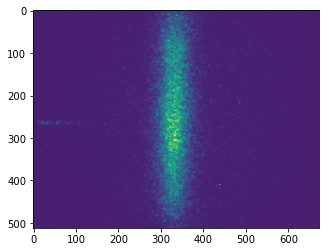

In [316]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
img = data.get("/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData")
img_height = data.get("/AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight")[0]
img_width = data.get("/AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth")[0]
img = np.resize(img.value,(img_height,img_width))
img = scipy.signal.medfilt(img)
plt.imshow(img)
plt.savefig('output.png')
plt.show()
plt.close()

In [317]:
import csv

#Function which finds out the shape, size, name and other attributes associates with a group/dataset present in the hdf5 file
def visitor_func(name, node):
    if isinstance(node, h5py.Dataset):
        size = node.size
        shape = node.shape
        g_or_d = "DATASET"
        try:
            data_type = node.dtype.name
        except(TypeError):
            data_type = "TypeError: No NumPy equivalent for TypeBitfieldID exists"
    else: 
        shape = ""
        dtype = ""
        g_or_d = "GROUP"
        data_type = ""
        try:
            size = str(node.__len__()) + "members"
        except(AttributeError):
            size = ""
        
    #exception, acqStamp and comment are other attributes which i found might be important later
    #output_csv only contains the acolums required for the task but output_with_extra_attrs also
    #contains the attributes exception, acqStamp and comment
    exception = node.attrs.get('exception')
    acqStamp = node.attrs.get('acqStamp')
    comment = node.attrs.get('comment')
    output.append([g_or_d, name, size, shape, data_type, exception, comment, acqStamp])

data = h5py.File(filename,'r')
output = []
data.visititems(visitor_func)
outfile=open('output_with_extra_attrs.csv','w')
writer=csv.writer(outfile, delimiter=',')
writer.writerow(["Type", "Name", "Size", "Shape", "Data Type", "Exception", "Comment", "AcqStamp"])
writer.writerows(output)